In [1]:
!pip install biopython

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: qiskit-nature 0.5.0 has a non-standard dependency specifier qiskit-terra>=0.22.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of qiskit-nature or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


Structure exists: '/home/smohtash/xy/pdb1xy1.ent' 
Adjacency Matrix:
[[0. 1. 1. 0. 1. 1. 1. 1. 0.]
 [1. 0. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 0. 1. 1. 1. 0. 0. 0.]
 [0. 1. 1. 0. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 0. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 0. 0. 0. 1. 1. 0. 1. 1.]
 [1. 0. 0. 0. 0. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0.]]


/home/smohtash/.local/lib/python3.11/site-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 814.
  warnings.warn(
/home/smohtash/.local/lib/python3.11/site-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 826.
  warnings.warn(


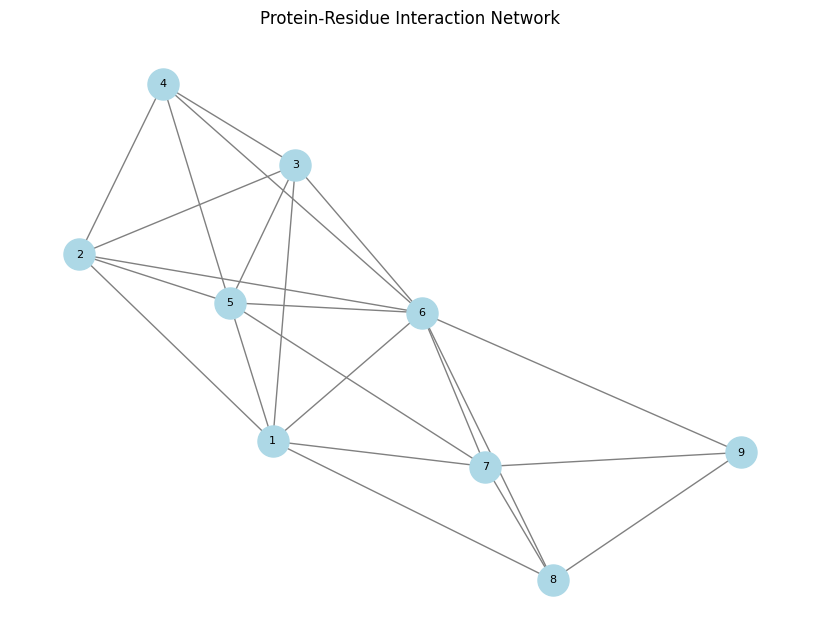

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from Bio import PDB
from Bio.PDB import PDBList

# Function to download PDB file from Protein Data Bank
def fetch_pdb(pdb_id):
    """Fetches a PDB file from the Protein Data Bank given a PDB ID."""
    pdbl = PDBList()
    pdb_file = pdbl.retrieve_pdb_file(pdb_id, file_format='pdb')
    return pdb_file

# Function to calculate the distance between two residues
def calculate_distance(residue_i, residue_j):
    """Calculates the Euclidean distance between the C-alpha atoms of two residues."""
    try:
        atom_i = residue_i["CA"].coord
        atom_j = residue_j["CA"].coord
        return np.linalg.norm(atom_i - atom_j)
    except KeyError:
        return float('inf')

# Function to construct a Protein-Residue Interaction Network
def construct_protein_residue_network(pdb_id, interaction_cutoff=8.0):
    """Constructs a residue interaction network from an online PDB file."""
    pdb_path = fetch_pdb(pdb_id)
    parser = PDB.PDBParser()
    structure = parser.get_structure("protein", pdb_path)
    G = nx.Graph()
    
    for chain in structure.get_chains():
        for residue_i in chain:
            for residue_j in chain:
                if residue_i != residue_j:
                    distance = calculate_distance(residue_i, residue_j)
                    if distance < interaction_cutoff:
                        G.add_edge(residue_i.get_id()[1], residue_j.get_id()[1])
    
    return G

# Example usage
pdb_id = "1XY1"  # Example PDB ID
interaction_cutoff = 8.0  # Distance cutoff in Angstroms
G = construct_protein_residue_network(pdb_id, interaction_cutoff)

# Extract residue indices from the graph
residues = list(G.nodes())  # Extract nodes (residue IDs) from the network

# Function to create adjacency matrix
def create_adjacency_matrix(G, residues):
    """Creates an adjacency matrix from the interaction network."""
    residues = list(set(residues))  # Ensure uniqueness
    adjacency_matrix = nx.to_numpy_array(G, nodelist=residues)
    return adjacency_matrix


# Create adjacency matrix using the corrected residue list
adj_matrix = create_adjacency_matrix(G, residues)

print("Adjacency Matrix:")
print(adj_matrix)

# Save adjacency matrix to file
np.savetxt("adjacency_matrix.txt", adj_matrix, fmt="%d")

# Draw the network
# Draw the network
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=8)
plt.title("Protein-Residue Interaction Network")

# Save the figure as an EPS file
plt.savefig("protein_residue_interaction_network.eps", format='eps', dpi=300)

# Optional: If you also want to display it on screen
plt.show()



Top Residues by Eigenvector Centrality:
Residue 6: 0.4545
Residue 5: 0.3876
Residue 1: 0.3820
Residue 2: 0.3402
Residue 3: 0.3402
Residue 7: 0.3049
Residue 4: 0.2807
Residue 8: 0.2446
Residue 9: 0.1851


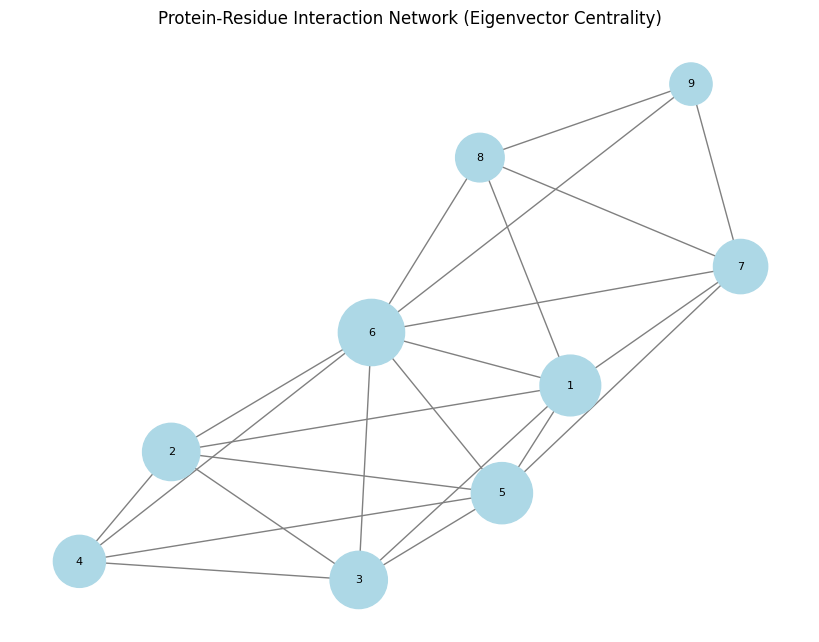

In [3]:
def compute_eigenvector_centrality(G):
    """
    Computes the eigenvector centrality of the protein-residue interaction network.

    Parameters:
    G (networkx.Graph): The protein-residue interaction network.

    Returns:
    dict: A dictionary of nodes with their eigenvector centrality scores.
    """
    try:
        centrality = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-6)
        return centrality
    except nx.NetworkXError as e:
        print(f"Eigenvector centrality calculation failed: {e}")
        return None

# Compute eigenvector centrality
eigenvector_centrality = compute_eigenvector_centrality(G)

# Print top residues by eigenvector centrality
print("Top Residues by Eigenvector Centrality:")
sorted_centrality = sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)
for residue, score in sorted_centrality[:10]:  # Print top 10 residues
    print(f"Residue {residue}: {score:.4f}")

# Visualization: Draw network with node sizes based on eigenvector centrality
plt.figure(figsize=(8, 6))
node_sizes = [5000 * eigenvector_centrality[node] for node in G.nodes()]  # Scale node sizes
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray',
        node_size=node_sizes, font_size=8)
plt.title("Protein-Residue Interaction Network (Eigenvector Centrality)")

# Save the figure as an EPS file
plt.savefig("protein_residue_interaction_network_eigenvector.eps", format='eps', dpi=300)

# Show the plot (optional)
plt.show()


In [4]:
pip install dwave-ocean-sdk


Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: qiskit-nature 0.5.0 has a non-standard dependency specifier qiskit-terra>=0.22.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of qiskit-nature or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


Note: you may need to restart the kernel to use updated packages.


In [5]:
import networkx as nx
import numpy as np
from dimod import BinaryQuadraticModel, SimulatedAnnealingSampler

# Define constants

A = adj_matrix
n = len(A)
tau = 5  # Desired number of top nodes
P0 = 1 / np.sqrt(n)  # Based on the paper
P1 = 5 * n          # Stronger penalty to enforce the constraint

def calculate_d_hat(adj_matrix):
    d = np.sum(adj_matrix, axis=1)
    d_hat = d / np.linalg.norm(d)
    return d_hat

d_hat = calculate_d_hat(A)

# Construct C matrix
I = np.eye(n)
U = np.ones((n, n)) - I
C = (1 - 2 * tau) * I + U

# Construct Q matrix
Q = -P0 * (A @ np.outer(d_hat, d_hat) @ A) \
    - P0 * (A @ np.outer(d_hat, d_hat) @ A) \
    + P1 * C

# Convert to BQM
bqm = BinaryQuadraticModel.from_numpy_matrix(Q)

# Simulated annealing
sampler = SimulatedAnnealingSampler()
response = sampler.sample(bqm, num_reads=10000, beta_range=(0.1, 4.0))

# Filter solutions with exactly tau selected nodes
valid_solutions = []
for sample, energy in response.data(['sample', 'energy']):
    if sum(sample.values()) == tau:
        valid_solutions.append((sample, energy))

if valid_solutions:
    best_sample, best_energy = min(valid_solutions, key=lambda x: x[1])
    top_nodes = [node + 1 for node, val in best_sample.items() if val == 1]

    print("Best valid sample:", best_sample)
    print("Energy:", best_energy)
    print("Top nodes:", top_nodes)
else:
    print("No valid solution with exactly τ selected nodes.")



/tmp/ipykernel_1982100/2447770376.py:31: DeprecationWarning: BQM.from_numpy_matrix(M) is deprecated since dimod 0.10.0 and will be removed in 0.12.0. Use BQM(M, "BINARY") instead.
  bqm = BinaryQuadraticModel.from_numpy_matrix(Q)


Best valid sample: {0: 1, 1: 1, 2: 1, 3: 0, 4: 1, 5: 1, 6: 0, 7: 0, 8: 0}
Energy: -1194.4285714285716
Top nodes: [1, 2, 3, 5, 6]


In [6]:
import networkx as nx
import numpy as np
from dimod import BinaryQuadraticModel, SimulatedAnnealingSampler

# Define constants

A = adj_matrix
n = len(A)
tau = 4  # Desired number of top nodes
P0 = 1 / np.sqrt(n)  # Based on the paper
P1 = 5 * n          # Stronger penalty to enforce the constraint

def calculate_d_hat(adj_matrix):
    d = np.sum(adj_matrix, axis=1)
    d_hat = d / np.linalg.norm(d)
    return d_hat

d_hat = calculate_d_hat(A)

# Construct C matrix
I = np.eye(n)
U = np.ones((n, n)) - I
C = (1 - 2 * tau) * I + U

# Construct Q matrix
Q = -P0 * (A @ np.outer(d_hat, d_hat) @ A) \
    - P0 * (A @ np.outer(d_hat, d_hat) @ A) \
    + P1 * C

# Convert to BQM
bqm = BinaryQuadraticModel.from_numpy_matrix(Q)

# Simulated annealing
sampler = SimulatedAnnealingSampler()
response = sampler.sample(bqm, num_reads=10000, beta_range=(0.1, 4.0))

# Filter solutions with exactly tau selected nodes
valid_solutions = []
for sample, energy in response.data(['sample', 'energy']):
    if sum(sample.values()) == tau:
        valid_solutions.append((sample, energy))

if valid_solutions:
    best_sample, best_energy = min(valid_solutions, key=lambda x: x[1])
    top_nodes = [node + 1 for node, val in best_sample.items() if val == 1]

    print("Best valid sample:", best_sample)
    print("Energy:", best_energy)
    print("Top nodes:", top_nodes)
else:
    print("No valid solution with exactly τ selected nodes.")


/tmp/ipykernel_1982100/260884809.py:31: DeprecationWarning: BQM.from_numpy_matrix(M) is deprecated since dimod 0.10.0 and will be removed in 0.12.0. Use BQM(M, "BINARY") instead.
  bqm = BinaryQuadraticModel.from_numpy_matrix(Q)


Best valid sample: {0: 1, 1: 0, 2: 1, 3: 0, 4: 1, 5: 1, 6: 0, 7: 0, 8: 0}
Energy: -766.7962962962964
Top nodes: [1, 3, 5, 6]


In [7]:
import networkx as nx
import numpy as np
from dimod import BinaryQuadraticModel, SimulatedAnnealingSampler

# Define constants

A = adj_matrix
n = len(A)
tau = 3  # Desired number of top nodes
P0 = 1 / np.sqrt(n)  # Based on the paper
P1 = 5 * n          # Stronger penalty to enforce the constraint

def calculate_d_hat(adj_matrix):
    d = np.sum(adj_matrix, axis=1)
    d_hat = d / np.linalg.norm(d)
    return d_hat

d_hat = calculate_d_hat(A)

# Construct C matrix
I = np.eye(n)
U = np.ones((n, n)) - I
C = (1 - 2 * tau) * I + U

# Construct Q matrix
Q = -P0 * (A @ np.outer(d_hat, d_hat) @ A) \
    - P0 * (A @ np.outer(d_hat, d_hat) @ A) \
    + P1 * C

# Convert to BQM
bqm = BinaryQuadraticModel.from_numpy_matrix(Q)

# Simulated annealing
sampler = SimulatedAnnealingSampler()
response = sampler.sample(bqm, num_reads=10000, beta_range=(0.1, 4.0))

# Filter solutions with exactly tau selected nodes
valid_solutions = []
for sample, energy in response.data(['sample', 'energy']):
    if sum(sample.values()) == tau:
        valid_solutions.append((sample, energy))

if valid_solutions:
    best_sample, best_energy = min(valid_solutions, key=lambda x: x[1])
    top_nodes = [node + 1 for node, val in best_sample.items() if val == 1]

    print("Best valid sample:", best_sample)
    print("Energy:", best_energy)
    print("Top nodes:", top_nodes)
else:
    print("No valid solution with exactly τ selected nodes.")


/tmp/ipykernel_1982100/3891042965.py:31: DeprecationWarning: BQM.from_numpy_matrix(M) is deprecated since dimod 0.10.0 and will be removed in 0.12.0. Use BQM(M, "BINARY") instead.
  bqm = BinaryQuadraticModel.from_numpy_matrix(Q)


Best valid sample: {0: 1, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 0, 7: 0, 8: 0}
Energy: -433.61375661375655
Top nodes: [1, 5, 6]


In [10]:
import networkx as nx
import numpy as np
from dimod import BinaryQuadraticModel, SimulatedAnnealingSampler

# Define constants

A = adj_matrix
n = len(A)
tau = 2  # Desired number of top nodes
P0 = 1 / np.sqrt(n)  # Based on the paper
P1 = 10 * n          # Stronger penalty to enforce the constraint

def calculate_d_hat(adj_matrix):
    d = np.sum(adj_matrix, axis=1)
    d_hat = d / np.linalg.norm(d)
    return d_hat

d_hat = calculate_d_hat(A)

# Construct C matrix
I = np.eye(n)
U = np.ones((n, n)) - I
C = (1 - 2 * tau) * I + U

# Construct Q matrix
Q = -P0 * (A @ np.outer(d_hat, d_hat) @ A) \
    - P0 * (A @ np.outer(d_hat, d_hat) @ A) \
    + P1 * C

# Convert to BQM
bqm = BinaryQuadraticModel.from_numpy_matrix(Q)

# Simulated annealing
sampler = SimulatedAnnealingSampler()
response = sampler.sample(bqm, num_reads=10000, beta_range=(0.1, 4.0))

# Filter solutions with exactly tau selected nodes
valid_solutions = []
for sample, energy in response.data(['sample', 'energy']):
    if sum(sample.values()) == tau:
        valid_solutions.append((sample, energy))

if valid_solutions:
    best_sample, best_energy = min(valid_solutions, key=lambda x: x[1])
    top_nodes = [node + 1 for node, val in best_sample.items() if val == 1]

    print("Best valid sample:", best_sample)
    print("Energy:", best_energy)
    print("Top nodes:", top_nodes)
else:
    print("No valid solution with exactly τ selected nodes.")


/tmp/ipykernel_1982100/34986105.py:31: DeprecationWarning: BQM.from_numpy_matrix(M) is deprecated since dimod 0.10.0 and will be removed in 0.12.0. Use BQM(M, "BINARY") instead.
  bqm = BinaryQuadraticModel.from_numpy_matrix(Q)


Best valid sample: {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0}
Energy: -373.33597883597986
Top nodes: [1, 6]


In [8]:
import networkx as nx
import numpy as np
from dimod import BinaryQuadraticModel, SimulatedAnnealingSampler

# Define constants

A = adj_matrix
n = len(A)
tau = 1  # Desired number of top nodes
P0 = 1 / np.sqrt(n)  # Based on the paper
P1 = 5 * n          # Stronger penalty to enforce the constraint

def calculate_d_hat(adj_matrix):
    d = np.sum(adj_matrix, axis=1)
    d_hat = d / np.linalg.norm(d)
    return d_hat

d_hat = calculate_d_hat(A)

# Construct C matrix
I = np.eye(n)
U = np.ones((n, n)) - I
C = (1 - 2 * tau) * I + U

# Construct Q matrix
Q = -P0 * (A @ np.outer(d_hat, d_hat) @ A) \
    - P0 * (A @ np.outer(d_hat, d_hat) @ A) \
    + P1 * C

# Convert to BQM
bqm = BinaryQuadraticModel.from_numpy_matrix(Q)

# Simulated annealing
sampler = SimulatedAnnealingSampler()
response = sampler.sample(bqm, num_reads=10000, beta_range=(0.1, 4.0))

# Filter solutions with exactly tau selected nodes
valid_solutions = []
for sample, energy in response.data(['sample', 'energy']):
    if sum(sample.values()) == tau:
        valid_solutions.append((sample, energy))

if valid_solutions:
    best_sample, best_energy = min(valid_solutions, key=lambda x: x[1])
    top_nodes = [node + 1 for node, val in best_sample.items() if val == 1]

    print("Best valid sample:", best_sample)
    print("Energy:", best_energy)
    print("Top nodes:", top_nodes)
else:
    print("No valid solution with exactly τ selected nodes.")


/tmp/ipykernel_1982100/392432602.py:31: DeprecationWarning: BQM.from_numpy_matrix(M) is deprecated since dimod 0.10.0 and will be removed in 0.12.0. Use BQM(M, "BINARY") instead.
  bqm = BinaryQuadraticModel.from_numpy_matrix(Q)


Best valid sample: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0}
Energy: -48.820105820105596
Top nodes: [6]
